<a href="https://colab.research.google.com/github/jorchfv/MyYOLOv5_setup/blob/master/MyYolov5_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mount Google Drive**

This cell will link this **Google Colab** notebook to **Google Drive**, so everything that gets downloaded or created inside the notebook, stays in the the Drive.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#**Set up the Environment**

This cells will enable YOLOv5 to run, most of these cells should only be called the first time this notebook is evaluated, there will be comments about what each cell is doing and in some are separated (when they could well be in one cell), for future reference not to create a directory again, for example.

In [ ]:
# First we move into the folder where we want everything to be in
%cd /content/gdrive/My\ Drive/

/content/gdrive/My Drive


In [ ]:
# Once inside we can create another repository called 'ml_yolo'(machine learning YOLO) 
# This is one of the cells that only needs to be run the first time, because it creates the folder where everything will be
!mkdir ml_yolo

In [ ]:
# We move inside the newly built repository
%cd ml_yolo

/content/gdrive/My Drive/ml_yolo


In [ ]:
# Once inside 'ml_yolo' we need to clone (download) everything needed for YOLOv5 with the following command
!git clone http://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 1811 (delta 6), reused 9 (delta 2), pack-reused 1794
Receiving objects: 100% (1811/1811), 5.09 MiB | 4.00 MiB/s, done.
Resolving deltas: 100% (1175/1175), done.


In [ ]:
# We move inside the newly created yolov5 folder
%cd yolov5

/content/gdrive/My Drive/ml_yolo/yolov5


In [ ]:
# We then change the HEAD of all the repositories inside, so it is inside this drive only 
# **Note** may need to add the option '-f' after checkout to force the command to go through
!git checkout ec72eea62bf5bb86b0272f2e65e413957533507f

Git normally never creates a ref that ends with 40 hex characters
because it will be ignored when you just specify 40-hex. These refs
may be created by mistake. For example,

  git checkout -b $br $(git rev-parse ...)

where "$br" is somehow empty and a 40-hex ref is created. Please
examine these refs and maybe delete them. Turn this message off by
running "git config advice.objectNameWarning false"
M	.gitignore
M	README.md
M	data/get_coco2017.sh
M	models/yolov5x.yaml
M	requirements.txt
M	utils/datasets.py
M	utils/utils.py
M	weights/download_weights.sh
Already on 'ec72eea62bf5bb86b0272f2e65e413957533507f'


In [ ]:
# We now install everything needed for YOLOv5
!pip install -U -r requirements.txt

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-h243pwbh
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-h243pwbh
Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 2)) (0.29.21)
     |████████████████████████████████| 20.4MB 143kB/s 
     |████████████████████████████████| 43.7MB 137kB/s 
Requirement already up-to-date: torch>=1.4 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 5)) (1.5.1+cu101)
     |████████████████████████████████| 11.5MB 54.8MB/s 
     |████████████████████████████████| 2.2MB 47.2MB/s 
     |████████████████████████████████| 6.8MB 50.3MB/s 
     |████████████████████████████████| 276kB 50.4MB/s 
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 10)) (0.6.1+cu101)
     |████████████████████████████████| 25.9MB 86kB/s 
     |█████████████████

In [ ]:
# We need to be in the 'yolov5' folder, so after restarting the runtime it may be needed to change to that folder again
%cd /content/gdrive/My\ Drive/ml_yolo/yolov5

/content/gdrive/My Drive/ml_yolo/yolov5


# **Download Config Files**

Download the datasets and the configuration files to run YOLOv5

In [ ]:
# Download the datasets and models
!gdown --id 1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO -O data/clothing.yaml
!gdown --id 1czESPsKbOWZF7_PkCcvRfTiUUJfpx12i -O models/yolov5x.yaml

Downloading...
From: https://drive.google.com/uc?id=1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO
To: /content/gdrive/My Drive/ml_yolo/yolov5/data/clothing.yaml
100% 172/172 [00:00<00:00, 153kB/s]
Downloading...
From: https://drive.google.com/uc?id=1czESPsKbOWZF7_PkCcvRfTiUUJfpx12i
To: /content/gdrive/My Drive/ml_yolo/yolov5/models/yolov5x.yaml
100% 1.58k/1.58k [00:00<00:00, 2.48MB/s]


In [ ]:
# We download the coco128 model, that works with the first 128 images of the coco dataset, and uzip it
# ** This is one of the cells that only need to be evaluated once **
!gdown --id 1n_oKgR81BJtqk75b00eAjdv03qVCQn2f -O coco128.zip
!unzip coco128.zip

Downloading...
From: https://drive.google.com/uc?id=1n_oKgR81BJtqk75b00eAjdv03qVCQn2f
To: /content/gdrive/My Drive/ml_yolo/yolov5/coco128.zip
22.1MB [00:00, 60.7MB/s]
Archive:  coco128.zip
   creating: coco128/
  inflating: coco128/.DS_Store       
  inflating: coco128/LICENSE         
   creating: coco128/images/
  inflating: coco128/images/.DS_Store  
   creating: coco128/images/train2017/
  inflating: coco128/images/train2017/000000000612.jpg  
  inflating: coco128/images/train2017/000000000404.jpg  
  inflating: coco128/images/train2017/000000000438.jpg  
  inflating: coco128/images/train2017/000000000389.jpg  
  inflating: coco128/images/train2017/000000000564.jpg  
  inflating: coco128/images/train2017/000000000149.jpg  
  inflating: coco128/images/train2017/000000000605.jpg  
  inflating: coco128/images/train2017/000000000349.jpg  
  inflating: coco128/images/train2017/000000000201.jpg  
  inflating: coco128/images/train2017/000000000599.jpg  
  inflating: coco128/images/train20

In [ ]:
# Check the NVIDIA-SMI
# ** IF this evaluation fails, go to Edit > Notebook Settings > Hardware Acceleratior and choose GPU and run again **
!nvidia-smi

Thu Jul 23 21:06:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Once we have the environment ready, we need to move some of the folders that we already have to make it work. The images from coco128.yaml are inside the directory coco128, which has to be next to the repository yolov5.

In [ ]:
# This is how it is right now
!tree -d

.
├── coco128
│   ├── annotations
│   ├── images
│   │   └── train2017
│   └── labels
│       └── train2017
├── data
├── inference
│   └── images
├── models
├── utils
└── weights

12 directories


Either using Drive or commands in the terminal we move the directory **coco128** to the same level as **yolov5**.


In [ ]:
!tree -d

.
├── coco128
│   ├── annotations
│   ├── images
│   │   └── train2017
│   └── labels
│       └── train2017
└── yolov5
    ├── data
    ├── inference
    │   └── images
    ├── models
    ├── utils
    └── weights

13 directories


We see now that the **coco128** repository is now next to the yolov5, we also need to do this with the training dataset we have for the tools we are interested in. We need to have that in the same level as **coco128** and **yolov5**.

In [ ]:
# First we need to download the Convert-VOC-to-YOLO from Ben's github
!git clone https://github.com/i3drobotics/Convert-VOC-to-YOLO.git

Cloning into 'Convert-VOC-to-YOLO'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 99 (delta 0), reused 2 (delta 0), pack-reused 96
Unpacking objects: 100% (99/99), done.
Checking out files: 100% (72/72), done.


Following the steps on Ben's github, it is necessary to check line 9 in 'convert_voc_to_yolo.py' so the classes match those needed. (In this case they do)

Running the "convert_voc_to_yolo.py" script will produce a folder in the "images" directory with a folder called "yolo" consisting of files in the yolo format.

In [ ]:
!python convert_voc_to_yolo.py

Finished processing: images


This cell has created a list of images and labels to put in two new repositories that we need to create next to **coco128** and **yolov5**, we will create a new directory called **tools**.

In [ ]:
!mkdir tools

In [ ]:
!tree -d

.
├── coco128
│   ├── annotations
│   ├── images
│   │   └── train2017
│   └── labels
│       └── train2017
├── Convert-VOC-to-YOLO
│   └── images
│       └── yolo
├── tools
└── yolov5
    ├── data
    ├── inference
    │   └── images
    ├── models
    ├── utils
    └── weights

17 directories


Along with this directory, some others need to be added inside **tools**, those are *images* and *labels* and inside those there will be 'train' and 'val' (for training and validation, respectively)

In [ ]:
!tree -d

.
├── coco128
│   ├── annotations
│   ├── images
│   │   └── train2017
│   └── labels
│       └── train2017
├── Convert-VOC-to-YOLO
│   └── images
│       └── yolo
├── tools
│   ├── images
│   │   ├── train
│   │   └── val
│   └── labels
│       ├── train
│       └── val
└── yolov5
    ├── data
    ├── inference
    │   └── images
    ├── models
    ├── utils
    └── weights

23 directories


Again, from the Google Drive interface or with commands, inside *train* and *val* in **images** we move the images from **Convert-VOC-to-YOLO** and in **labels** we put the yolo labels.

In this directories is where all the images we use to train the algorithm are saved and where the custom images can be added (with their labels as well).

In [ ]:
%cd /content/gdrive/My Drive/ml_yolo/yolov5

/content/gdrive/My Drive/ml_yolo/yolov5


# **Run the training**

In [ ]:
# We first see if everything has been installed and runs by eveluating 'test.py'
!python test.py --data ./data/coco128.yaml

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/coco128.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=False, single_cls=False, task='val', verbose=False, weights='weights/yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0    436      0 --:--:-- --:--:-- --:--:--   436
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 14.4M    0 14.4M    0     0  5659k      0 --:--:--  0:00:02 --:--:-- 5659k
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'models.yolo.Model' has changed. you can retrieve the original source code by accessing the 

In [ ]:
# If you wanted to train with a dataset of [people, dogs, bikes, buses] you can run
# !python train.py --epochs 100 --data ./data/coco128.yaml

We finally run our training with the images we uploaded in the **tools** directory, it is important to change the clothing.yaml number of classes to 9, i.e. `nc = 9`, if not this won't work.

Open *clothing.yaml* in a text editor and just change *nc* to 9. Google Colab allows you to change it inside as well.

Also need to check that the names of the classes are correct, i.e.

`names: ['tape_measure', 'spanner', 'pliers', 'scissors', 'hammer', 'spirit_level', 'screw_driver', 'knife', 'torque_wrench']`


In [ ]:
!python train.py --img 640 --batch 2 --epochs 30 \
  --data ./data/clothing.yaml --cfg ./models/yolov5x.yaml --weights ./weights/yolov5x.pt \
  --name yolov5xtest --cache

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From http://github.com/ultralytics/yolov5
 * [new branch]      patch1     -> origin/patch1
Namespace(adam=False, batch_size=2, bucket='', cache_images=True, cfg='./models/yolov5x.yaml', data='./data/clothing.yaml', device='', epochs=30, evolve=False, img_size=[640], multi_scale=False, name='yolov5xtest', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='./weights/yolov5x.pt')
Using CUDA device0 _Cud

**Note**.
`!python train.py --img 640 --batch 2 --epochs 30 \
  --data ./data/tools.yaml --cfg ./models/yolov5x.yaml --weights ./weights/yolov5x.pt \
  --name yolov5xtest --cache`

  `--img 640` -- is just the size of the image

  `--batch 2` -- is the number of batches we are using, meaning how many subsets of the images we are making, normally ~64 (I did not use that number because I do not have enough memory on Google Colab)
  
  `--epochs 30` -- is taking 30 epochs to complete the training, if more accuracy is wanted there needs to be a subtle equilibrium between the number of batches and epochs.



# **Run the detection**

Once the training has been completed, the weights are saved in the **weights** directory, so in order to have an accurate detection, we take the one that YOLOv5 labelled as *best_'name'.pt* and use that to perform our detections. 

To perform the detection, we add a couple of images to the **inference/images** directory, which is from where we take the images to make a detection.

In the **output** directory is where the images with the detections are saved.

**Note.** that these cells can only run once the training has been completed, otherwise there will be Errors everywhere.

In [ ]:
!python detect.py --weights weights/best_yolov5xtest.pt \
  --img 640 --conf 0.4 --source ./inference/images/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='./inference/images/', view_img=False, weights='weights/best_yolov5xtest.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

image 1/4 inference/images/bus.jpg: 640x512 Done. (0.040s)
image 2/4 inference/images/detect_sharp_29.jpg: 576x640 8 spanners, 3 screw_drivers, Done. (0.047s)
image 3/4 inference/images/detect_sharp_7.jpg: 576x640 7 spanners, Done. (0.046s)
image 4/4 inference/images/zidane.jpg: 384x640 Done. (0.036s)
Results saved to /content/gdrive/My Drive/ml_yolo/yolov5/inference/output
Done. (3.480s)


OpenCV cannot open an image in Google Colab, so these are some helper functions to help us visualise what is happening with our detections.

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

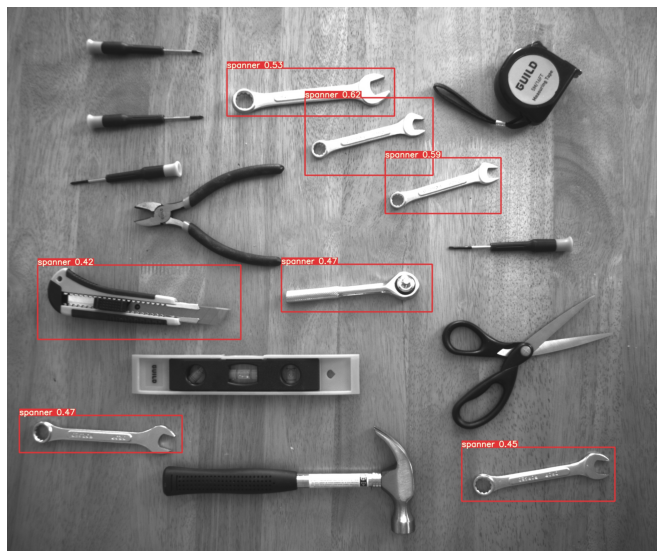

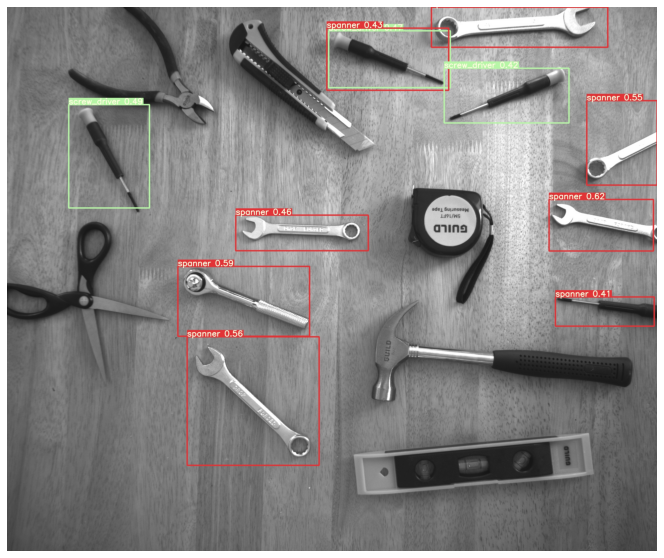

In [ ]:
imShow('../yolov5/inference/output/detect_sharp_7.jpg')
imShow('../yolov5/inference/output/detect_sharp_29.jpg')

**Note**. The bigger the training set and the longer the training is (i.e. more epochs) the more accurate the object identification will be.